In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 


In [3]:
# Reading .DATA file 
data = pd.read_csv('Data/kddcup.data/kddcup.data', header=None) 

In [5]:
print(data.head())

   0    1     2   3    4      5   6   7   8   9   ...  32   33   34    35  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.00   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.00   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.50   
3   0  tcp  http  SF  233   2032   0   0   0   0  ...   3  1.0  0.0  0.33   
4   0  tcp  http  SF  239    486   0   0   0   0  ...   4  1.0  0.0  0.25   

    36   37   38   39   40       41  
0  0.0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  0.0  normal.  
3  0.0  0.0  0.0  0.0  0.0  normal.  
4  0.0  0.0  0.0  0.0  0.0  normal.  

[5 rows x 42 columns]


In [6]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
data.columns=columns


In [7]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
} 

data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]]) 

In [9]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [11]:
data['target'].value_counts() 

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [12]:
#Finding categorical features
num_cols = data._get_numeric_data().columns

cate_cols = list(set(data.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')


In [14]:

cate_cols 

['service', 'protocol_type', 'flag']

<Axes: ylabel='service'>

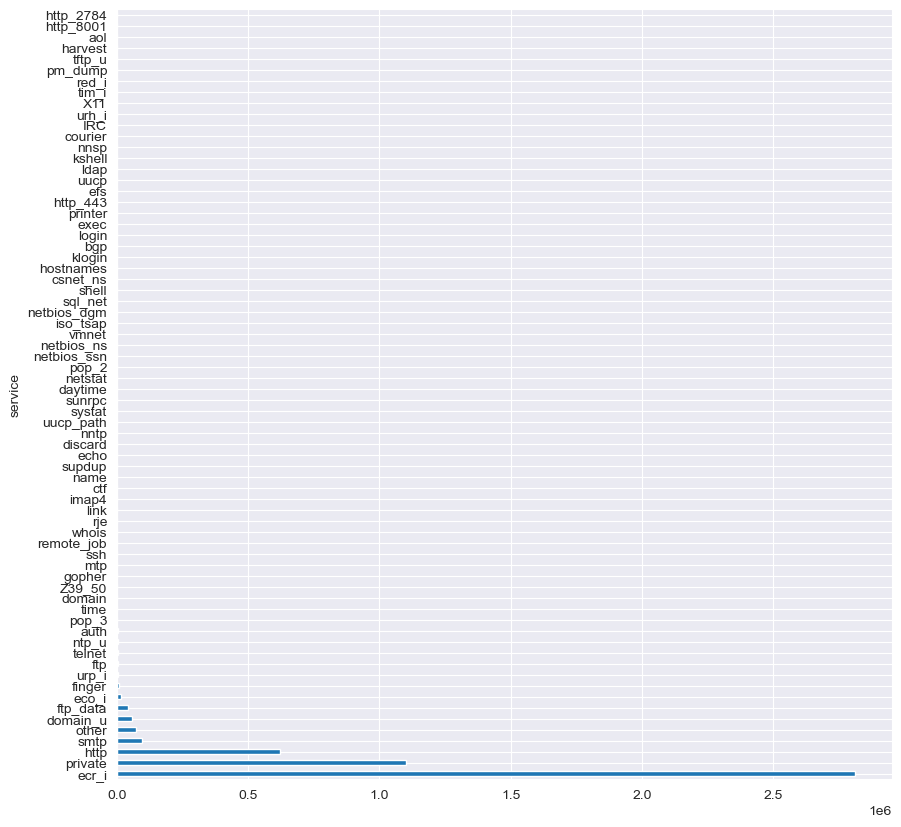

In [16]:
data['service'].value_counts().plot(kind='barh', figsize=(10,10))

<Axes: xlabel='protocol_type'>

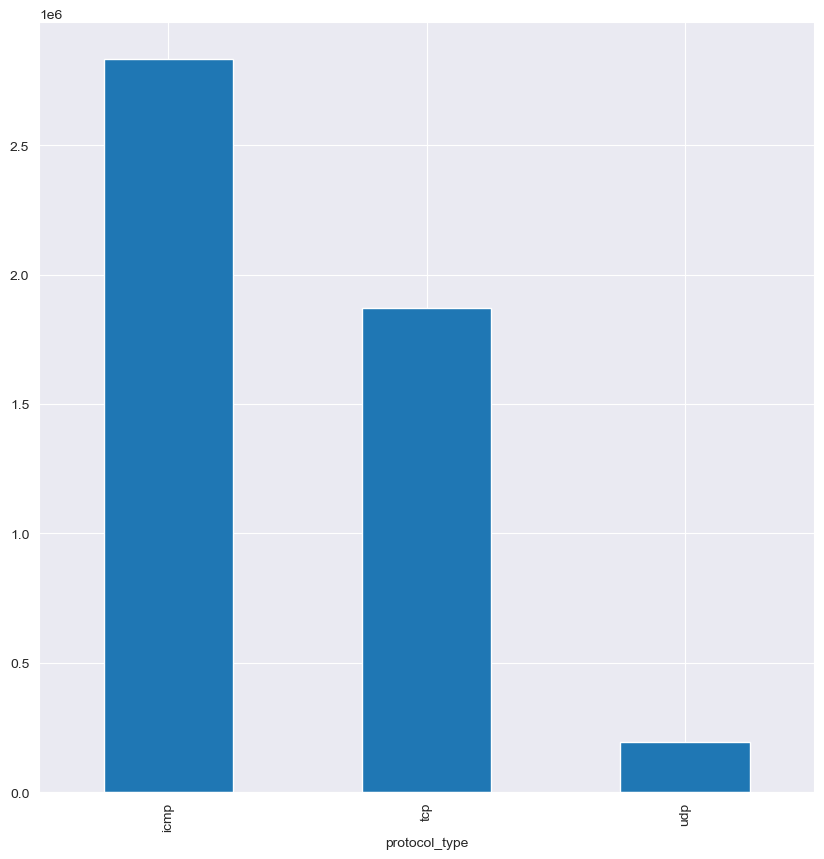

In [18]:
data['protocol_type'].value_counts().plot(kind='bar', figsize=(10,10))
 

<Axes: xlabel='protocol_type'>

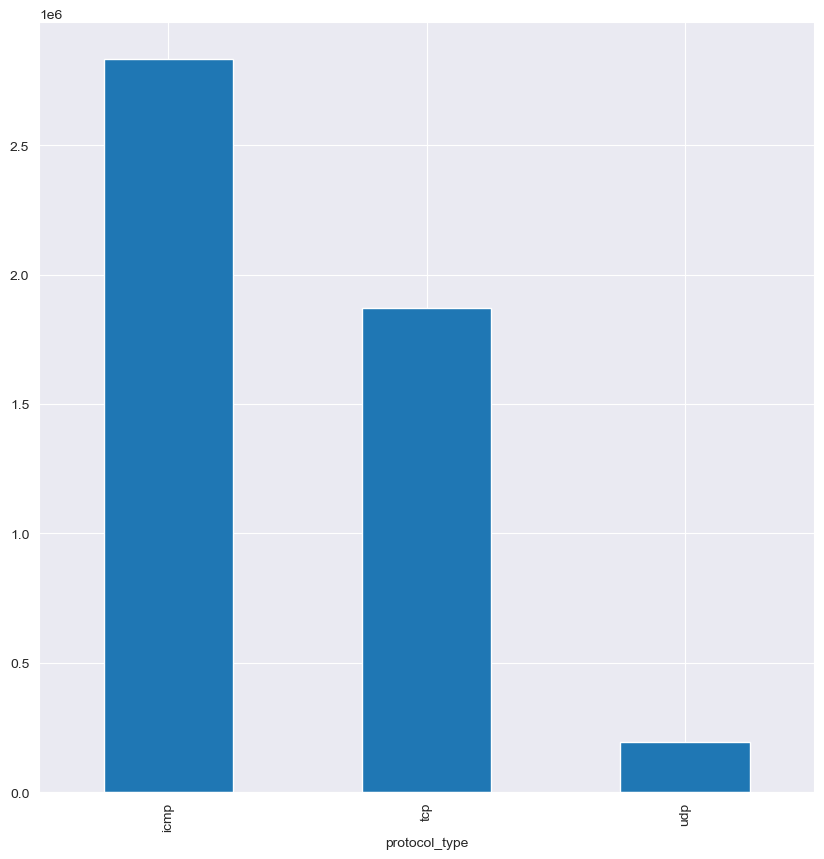

In [19]:
data['protocol_type'].value_counts().plot(kind='bar', figsize=(10,10))
  